<a href="https://colab.research.google.com/github/smnizza/machine-learning-guide/blob/main/USL_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders – Jaringan Saraf untuk Kompresi Data

Autoencoder adalah jenis jaringan saraf yang digunakan untuk **kompresi data**, **reduksi dimensi**, dan **denoising**.

## Bagaimana Autoencoder Bekerja?
1. **Encoder**: Mengubah input menjadi representasi berdimensi lebih rendah (kode laten).
2. **Latent Space**: Representasi tersembunyi yang berisi informasi penting dari data.
3. **Decoder**: Merekonstruksi data kembali dari representasi laten.

## Aplikasi Autoencoders
- **Reduksi Dimensi** (seperti PCA tapi berbasis deep learning)
- **Denoising** (menghapus noise dari gambar)
- **Anomaly Detection** (mendeteksi anomali dengan merekonstruksi data normal)

## Implementasi Autoencoder pada Dataset MNIST
Kita akan menggunakan dataset MNIST untuk melatih Autoencoder guna melakukan kompresi dan rekonstruksi gambar digit tangan.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load dataset MNIST
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

# Normalisasi ke range [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ubah shape agar kompatibel dengan model (tambahkan channel)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Ukuran input
input_shape = X_train.shape[1:]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Encoder
input_layer = Input(shape=input_shape)
x = Flatten()(input_layer)
encoded = Dense(64, activation="relu")(x)

# Decoder
x = Dense(784, activation="relu")(encoded)
decoded = Reshape((28, 28, 1))(x)

# Model Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Tampilkan arsitektur model
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

## Struktur Model Autoencoder
- **Encoder** mengompresi gambar menjadi 64 unit laten.
- **Decoder** merekonstruksi gambar dari representasi laten.

In [6]:
# Melatih model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0527 - val_loss: 0.0156
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0145 - val_loss: 0.0116
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0087 - val_loss: 0.0086


## Pelatihan Autoencoder
Model dilatih dengan input dan target yang sama, sehingga belajar merekonstruksi gambar.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


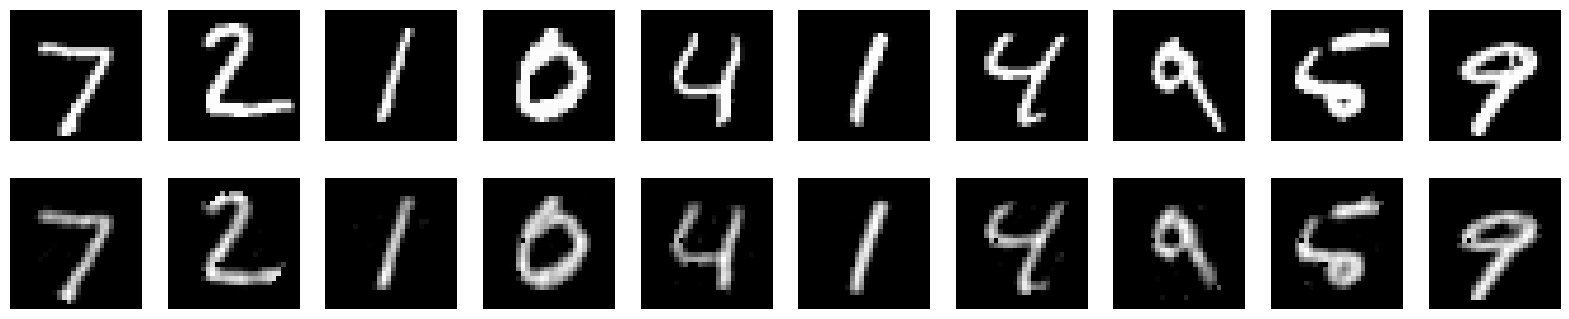

In [7]:
# Prediksi hasil rekonstruksi
decoded_imgs = autoencoder.predict(X_test)

# Menampilkan beberapa gambar asli dan rekonstruksi
n = 10  # Jumlah gambar untuk ditampilkan
plt.figure(figsize=(20, 4))
for i in range(n):
    # Gambar asli
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Gambar hasil rekonstruksi
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

## Interpretasi Hasil Autoencoder
- **Gambar atas**: Input asli dari dataset MNIST.
- **Gambar bawah**: Hasil rekonstruksi dari autoencoder.
- Jika rekonstruksi mirip dengan input, berarti autoencoder bekerja dengan baik.

## Kesimpulan
- **Autoencoder** dapat mengurangi dimensi data tanpa kehilangan informasi penting.
- Teknik ini sering digunakan untuk **reduksi noise**, **kompresi**, dan **pendeteksian anomali**.
- Model bisa diperbaiki dengan **menggunakan CNN atau Variational Autoencoders (VAE)**.

### **Pengembangan Lebih Lanjut**
- **Autoencoder dengan CNN** untuk meningkatkan akurasi.
- **Denoising Autoencoder** untuk membersihkan data berisik.
- **Variational Autoencoder (VAE)** untuk menghasilkan data baru.